# DSC 530 Week 4 Exercise 4.2

Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [3]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

In [4]:
import numpy as np

Again, I'll load the NSFG pregnancy file and select live births:

In [6]:
import nsfg
import first
import thinkstats2
import thinkplot

## Exercise 3-1
Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [8]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [9]:
resp = nsfg.ReadFemResp()

In [10]:
# Checking the NSFG respondent variable numkbhh
resp.numkdhh.head()

0    3
1    0
2    0
3    0
4    0
Name: numkdhh, dtype: int64

In [11]:
# Construct the actual distribution 
pmf = thinkstats2.Pmf(resp.numkdhh, label="actual")

In [12]:
# Construct the biased distribution
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)

    new_pmf.Normalize()
    return new_pmf

biased_pmf = BiasPmf(pmf, label="biased")

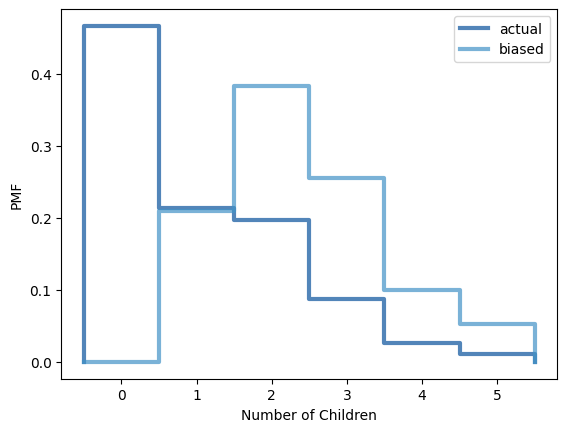

In [13]:
# Plot the actual and biased distributions
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel="Number of Children", ylabel="PMF")

In [14]:
# Compute the means
print(f'Actual Distribution Mean: {pmf.Mean()} \nBiased Distribution Mean: {biased_pmf.Mean()}')

Actual Distribution Mean: 1.024205155043831 
Biased Distribution Mean: 2.403679100664282


## Exercise 3-2

Given the PMF, the mean is calculated as $\bar{x} = \sum\limits_{i}p_{i}\,x_{i}$ where the $x_{i}$ are the unique values in the PMF and $p_{i} = PMF(x_{i})$.

Similarly, variance is calculated as $S^2 = \sum\limits_{i}p_{i}\:(x_{i}\,-\,\bar{x})^2$.

Write functions called PmfMean and PmfVar that takes a Pmf object and compute the mean and variance. Check against the methods Mean and Var provided by Pmf.

In [16]:
# Write the PmfMean function according to the formula above
def pmf_mean(pmf):
    result = 0
    for x, p in pmf.Items():
        result += (x * p)
    return result

In [17]:
# Checking against the method Mean provided by Pmf
print(f'Mean provided by Pmf: {pmf.Mean()} \nMean provided by the function: {pmf_mean(pmf)}')

Mean provided by Pmf: 1.024205155043831 
Mean provided by the function: 1.024205155043831


In [18]:
# Write the PmfVar function according to the formula above
def pmf_var(pmf):
    result = 0
    mean = pmf_mean(pmf)
    for x, p in pmf.Items():
        result += p * (x - mean)**2
    return result

In [19]:
# Checking against the method Var provided by Pmf
print(f'Mean provided by Pmf: {pmf.Var()} \nMean provided by the function: {pmf_var(pmf)}')

Mean provided by Pmf: 1.4128643263531195 
Mean provided by the function: 1.4128643263531195


## Exercise 4-1

How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

In [21]:
# Loading the data
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
live.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [22]:
# Compute the distribution of birth weights
birth_weight = live.totalwgt_lb.dropna()
birth_weight_cdf = thinkstats2.Cdf(birth_weight, label='live births cdf')
print(list(birth_weight_cdf.Items())[:10])

[(0.125, 0.00011064394777605666), (0.3125, 0.00011064394777605666), (0.4375, 0.00011064394777605662), (0.5625, 0.0001106439477760567), (0.625, 0.00022128789555211323), (0.9375, 0.00011064394777605664), (1.0, 0.00011064394777605675), (1.0625, 0.00033193184332816993), (1.125, 0.00022128789555211329), (1.1875, 0.00011064394777605653)]


My birth weight was 8.38 lbs and I was the first born

In [24]:
# Define the percentile rank function using the single scores
def percentilerank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = (count / len(scores)) * 100
    return percentile_rank

In [25]:
# Define the percentile rank function using the CDF distribution
def percentilerank_cdf(cdf, your_score):
    sum = 0
    for x, p in cdf.Items():
        if x <= your_score:
            sum += p

    return sum * 100

In [26]:
# Find my percentile rank using the single scores
percentilerank(birth_weight, 8.38)

81.42288116840008

In [27]:
# Find my percentile rank using the CDF distribution
percentilerank_cdf(birth_weight_cdf, 8.38)

81.42288116840008

In [28]:
# Get the data for the birth babies
import first

live, firsts, others = first.MakeFrames()

In [29]:
# Compute the distribution of first baby
first_weight = firsts.totalwgt_lb.dropna()
first_weight_cdf = thinkstats2.Cdf(first_weight, label='first births cdf')
print(list(first_weight_cdf.Items())[:10])

[(0.125, 0.00022920009168003668), (0.3125, 0.00022920009168003668), (0.4375, 0.0002292000916800367), (0.625, 0.00022920009168003665), (0.9375, 0.00022920009168003665), (1.0, 0.00022920009168003676), (1.0625, 0.00022920009168003654), (1.125, 0.00022920009168003676), (1.1875, 0.00022920009168003676), (1.25, 0.00022920009168003654)]


In [30]:
# Calcute my first baby percentile rank using the single scores
percentilerank(first_weight, 8.38)

83.31423332569334

In [31]:
# Find my first baby percentile rank using the CDF distribution
percentilerank_cdf(first_weight_cdf, 8.38)

83.31423332569334

## Exercise 4-2

The numbers generated by `numpy.random.random` are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from `numpy.random.random` and plot their PMF.  What goes wrong?

Now plot the CDF. Is the distribution uniform?

In [33]:
# Generate 1000 numbers from numpy.random.random
numbers = np.random.random(1000)
numbers[:10]

array([0.86628454, 0.45745654, 0.42520702, 0.03846277, 0.42177106,
       0.04459526, 0.41012619, 0.11850125, 0.7060402 , 0.03554369])

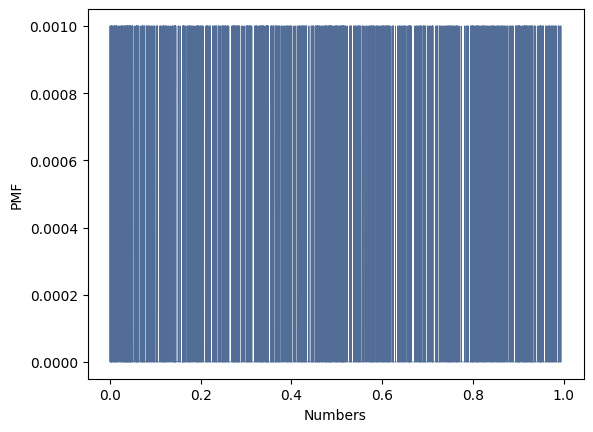

In [34]:
# Plot the PMF
pmf_random = thinkstats2.Pmf(numbers)
thinkplot.Pmf(pmf_random, linewidth = 0.5)
thinkplot.Config(xlabel='Numbers', ylabel='PMF')

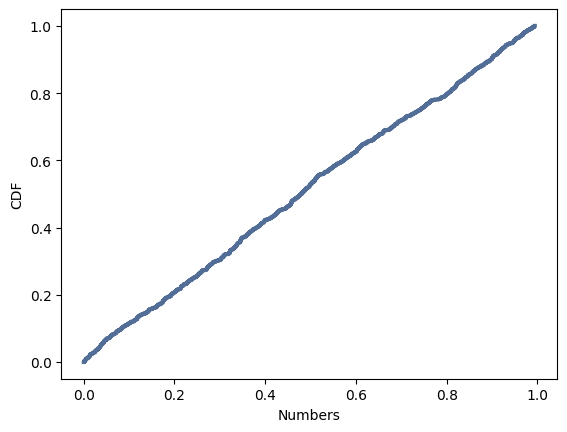

In [35]:
# Plot the CDF
cdf_random = thinkstats2.Cdf(numbers)
thinkplot.Cdf(cdf_random)
thinkplot.Config(xlabel='Numbers', ylabel='CDF')

The PMF shows an even distribution of values across the range from 0 to 1, indicating the numbers are uniformly distributed. The CDF shows an almost straight diagonal line from (0,0) to (1,1), inficating a uniform distribution.